# Exploring Seattle City Wages

This is a brief look at the wage data for various public departments within my city of Seattle. This and other public municipal data is readily available through Seattle's [Open Data Portal](https://data.seattle.gov/).

## Data Download

I pulled this data from the city's open data page on [wages for various public servant positions](https://data.seattle.gov/City-Administration/City-of-Seattle-Wage-Data/2khk-5ukd/about_data).
I'm subsequently updating and posting my version of the data on GitHub for easy access for the purposes of this project. The only difference between this updated version and the original downloadable version from the Open Data Portal is that I have removed the first and last names of all employees. In place of employee names, I've added a single ID column.

This project is just some basic exploratory data analysis. The only necessary packages are `pandas`, `matplotlib`, and `seaborn`, so nothing out of the ordinary. We'll read in the comma-delimited data with `pandas` and convert the column headers to snake_case for easier handling.

Taking a look at the data, we see our four data fields: 3 string columns and 1 numeric column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FuncFormatter

# File path
path = "https://raw.githubusercontent.com/bryantjay/Portfolio/refs/heads/main/Quickies/Seattle%20Labor%20Spending%20by%20Department/source_files/City_of_Seattle_Wage_Data_20250222.csv"

# CSV data read in as dataframe
wages = pd.read_csv(path)

# Converting column names to snake_case format
wages.columns = wages.columns.str.strip().str.replace(' ', '_').str.replace(r'([a-z0-9])([A-Z])', r'\1_\2').str.lower()

print(wages.head(10), "\n")
print(wages.info(), "\n")
print(wages.describe(include='all'))

  employee_id                      department                 job_title  \
0      E00001  Office of Economic Development        StratAdvsr2,Exempt   
1      E00002  Office of Economic Development        Admin Staff Asst *   
2      E00003      Education & Early Learning        StratAdvsr1,Exempt   
3      E00004      Education & Early Learning          Admin Staff Asst   
4      E00005      Education & Early Learning  Grants&Contracts Spec,Sr   
5      E00006      Education & Early Learning       Early Ed Spec,Sr BU   
6      E00007    Police Relief & Pension Fund       Contract Employee *   
7      E00008              Parks & Recreation         Sfty&Hlth Spec,Sr   
8      E00009              Parks & Recreation      High School Intern *   
9      E00010              Parks & Recreation      High School Intern *   

   hourly_rate  
0       71.320  
1       38.460  
2       60.646  
3       44.830  
4       43.100  
5       52.200  
6       94.473  
7       53.820  
8       19.970  
9   

## Early Exploration

In the above `describe()` statement, we can note a few things:
- 13,149 rows are included, each referencing a single department position.
- The data includes a total of 40 different city departments and 1,157 different positions (not differentiating similarly named positions across different departments).
- Parks & Rec seems to have the most employed positions out of all departments.
- Hourly wages range from \$5.53/hr (which is technically illegal, but there's more to this number) to \$236.48/hr(!).
- Most people are paid within the range of $38-65 per hour.

The department statistics are really what I'm after here. Moving forward, I'm going to group the data into the different departments and subsequently explore the aggregates. We'll take a look at the number of different positions for each department, the number of employees for each, and the mean and median wages. Since we're dealing with wage data, and wages are typically skewed toward higher earners, medians will be our most reliable central tendency statistic rather than means.

I'm also creating a simple statistic for hourly labor expenditures (`hourly_dept_exp`) for each department, which is the product of the department's median wage and its total number of employees (or at least employed positions).

In [2]:
# Printing out unique counts for department and job_title
print(f"Number of City Departments: {wages['department'].nunique()}")
print(f"Total Number of Positions: {wages['job_title'].nunique()}")

# Aggregating data table by department
departments = wages.groupby('department').agg(
    unique_job_titles=('job_title', 'nunique'),
    num_employees=('employee_id', 'size'),
    mean_hourly_rate=('hourly_rate', lambda x: round(x.mean(), 2)),
    median_hourly_rate=('hourly_rate', lambda x: round(x.median(), 2))
).reset_index()

# Adding two more custom columns
departments['pct_mean_med_diff'] = round((departments.mean_hourly_rate - departments.median_hourly_rate) / departments.median_hourly_rate * 100, 1)
departments['hourly_dept_exp'] = departments.num_employees * departments.median_hourly_rate

Number of City Departments: 40
Total Number of Positions: 1157


### Here's the data we're looking at:

|    | department                     |   unique_job_titles |   num_employees |   mean_hourly_rate |   median_hourly_rate |   pct_mean_med_diff |   hourly_dept_exp |
|---:|:-------------------------------|--------------------:|----------------:|-------------------:|---------------------:|--------------------:|-----------------------:|
|  0 | Arts & Culture                 |                  28 |              44 |              49.87 |                48.46 |                 2.9 |                2132.24 |
|  1 | City Auditor                   |                   4 |               9 |              72.26 |                73.88 |                -2.2 |                 664.92 |
|  2 | City Budget Office             |                   8 |              42 |              70.1  |                68.48 |                 2.4 |                2876.16 |
|  3 | City of Seattle                |                   2 |               2 |              88.01 |                88.01 |                 0   |                 176.02 |
|  4 | Civil Service Commissions      |                   4 |              13 |              21.46 |                 5.53 |               288.1 |                  71.89 |
|  5 | Commnty Asst Resp & Engagmt    |                  18 |             139 |              48.48 |                45.04 |                 7.6 |                6260.56 |
|  6 | Community Police Commission    |                   7 |              10 |              63.94 |                58.71 |                 8.9 |                 587.1  |
|  7 | Construction & Inspections     |                  91 |             431 |              59.81 |                58.85 |                 1.6 |               25364.4  |
|  8 | Econ & Revenue Forecasts Dept  |                   2 |               2 |              69.1  |                69.1  |                 0   |                 138.2  |
|  9 | Education & Early Learning     |                  36 |             115 |              54.62 |                52.2  |                 4.6 |                6003    |
| 10 | Employees' Retirement System   |                  16 |              31 |              63.75 |                60.83 |                 4.8 |                1885.73 |
| 11 | Ethics & Elections Commission  |                   7 |              10 |              65.15 |                66.34 |                -1.8 |                 663.4  |
| 12 | Finance & Admin Services       |                 128 |             574 |              53.84 |                51.56 |                 4.4 |               29595.4  |
| 13 | Fire Department                |                 135 |            1087 |              56.8  |                55.19 |                 2.9 |               59991.5  |
| 14 | Hearing Examiner               |                   5 |               5 |              65.18 |                60.83 |                 7.2 |                 304.15 |
| 15 | Human Services Department      |                  80 |             413 |              49.24 |                45.92 |                 7.2 |               18965    |
| 16 | Immigrant & Refugee Affairs    |                   6 |              11 |              54.58 |                50.92 |                 7.2 |                 560.12 |
| 17 | Information Technology         |                  49 |             619 |              66.18 |                64.07 |                 3.3 |               39659.3  |
| 18 | Intergovernment Relations      |                   4 |               9 |              72.69 |                71.21 |                 2.1 |                 640.89 |
| 19 | Legislative Department         |                  18 |              93 |              60.82 |                58.2  |                 4.5 |                5412.6  |
| 20 | Mayor's Office                 |                  11 |              38 |              72.39 |                63.88 |                13.3 |                2427.44 |
| 21 | Neighborhoods                  |                  25 |              58 |              53.72 |                53.19 |                 1   |                3085.02 |
| 22 | Off of Emergency Mngmnt Dept   |                  10 |              17 |              58.3  |                60.87 |                -4.2 |                1034.79 |
| 23 | Office for Civil Rights        |                  16 |              33 |              56.25 |                54.4  |                 3.4 |                1795.2  |
| 24 | Office of Economic Development |                  28 |              51 |              57.65 |                58.16 |                -0.9 |                2966.16 |
| 25 | Office of Employee OMBUD       |                   6 |               7 |              58.12 |                53.09 |                 9.5 |                 371.63 |
| 26 | Office of Housing              |                  35 |              60 |              56.16 |                52.2  |                 7.6 |                3132    |
| 27 | Office of Inspector General    |                   7 |              21 |              60.47 |                56.24 |                 7.5 |                1181.04 |
| 28 | Office of Labor Standards      |                  14 |              31 |              55.75 |                57.98 |                -3.8 |                1797.38 |
| 29 | Parks & Recreation             |                 190 |            2029 |              34.44 |                31.63 |                 8.9 |               64177.3  |
| 30 | Planning & Comm Development    |                  22 |              47 |              61.84 |                62.58 |                -1.2 |                2941.26 |
| 31 | Police Department              |                 135 |            1461 |              65.25 |                68.76 |                -5.1 |              100458    |
| 32 | Police Relief & Pension Fund   |                   1 |               5 |              85.03 |                78.73 |                 8   |                 393.65 |
| 33 | Seattle Center                 |                 102 |             617 |              37.81 |                38.69 |                -2.3 |               23871.7  |
| 34 | Seattle City Light             |                 272 |            1755 |              58.17 |                60.83 |                -4.4 |              106757    |
| 35 | Seattle Dept of Human Resource |                  36 |              99 |              63.93 |                61.06 |                 4.7 |                6044.94 |
| 36 | Seattle Dept of Transportation |                 158 |            1053 |              54.77 |                55.15 |                -0.7 |               58072.9  |
| 37 | Seattle Public Library         |                  99 |             633 |              41.38 |                39.11 |                 5.8 |               24756.6  |
| 38 | Seattle Public Utilities       |                 234 |            1425 |              53.53 |                49.58 |                 8   |               70651.5  |
| 39 | Sustainability & Environment   |                  23 |              50 |              59.24 |                63.64 |                -6.9 |                3182    |

## Visualizations

In [3]:
# Default plot settings
plt.rcParams['figure.facecolor'] = 'whitesmoke'
plt.rcParams['axes.facecolor'] = 'whitesmoke'
plt.rcParams['font.family'] = 'DejaVu Sans'

For the majority of our visuals, it helps to add a size component to each department in order to view the total magnitudes of spending. For example, the department labeled "City of Seattle" carries a high median wage of $88 per hour, but only employs two people in executive positions.

When we view the departments by the number of people they employ, we notice 12 departments that far exceed all others in terms of workforce size:
- 'Construction & Inspections'
- 'Finance & Admin Services'
- 'Fire Department'
- 'Human Services Department'
- 'Information Technology'
- 'Parks & Recreation'
- 'Police Department'
- 'Seattle Center'
- 'Seattle City Light'
- 'Seattle Dept of Transportation'
- 'Seattle Public Library'
- 'Seattle Public Utilities'

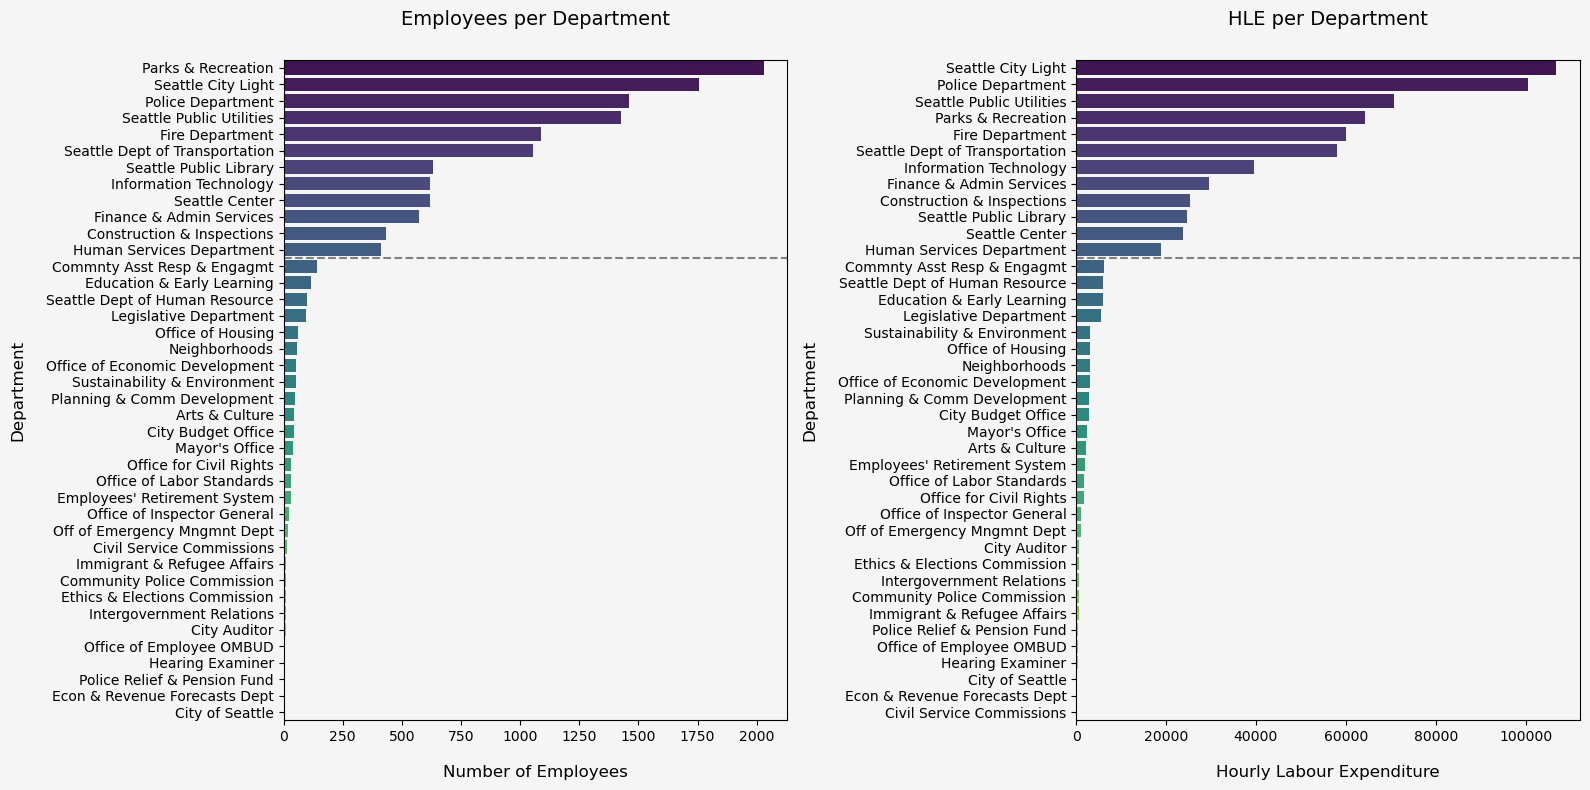

7         Construction & Inspections
12          Finance & Admin Services
13                   Fire Department
15         Human Services Department
17            Information Technology
29                Parks & Recreation
31                 Police Department
33                    Seattle Center
34                Seattle City Light
36    Seattle Dept of Transportation
37            Seattle Public Library
38          Seattle Public Utilities
Name: department, dtype: object


In [4]:
# Custom function to duplicate bar plot format
def plot_department_data(ax, x_column, xlabel, plot_title):
    # Sort departments by the specified x column in descending order
    departments_sorted = departments.sort_values(x_column, ascending=False)

    # Create the horizontal bar plot on the provided axis
    sns.barplot(
        data=departments_sorted,
        y='department',
        x=x_column,
        hue='department',
        palette='viridis',
        ax=ax
    )

    # Add a horizontal line to divide larger and smaller departments
    ax.axhline(y=11.5, color='grey', linestyle='--', linewidth=1.5)

    # Add labels and title
    ax.set_xlabel(xlabel, fontsize=12, labelpad=15)
    ax.set_ylabel('Department', fontsize=12, labelpad=15)
    ax.set_title(plot_title, fontsize=14, pad=25)


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first subplot
plot_department_data(axes[0], 'num_employees', 'Number of Employees', 'Employees per Department')

# Plot the second subplot
plot_department_data(axes[1], 'hourly_dept_exp', 'Hourly Labour Expenditure', 'HLE per Department')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


print(departments[departments['num_employees'] > 400]['department'])


We're going to focus on these larger departments and take a look at their spending statistics. More specifically, I'd like to take a look at Police Department expenditures and compare them to the labor expenses of other large city departments.

In [5]:
# Filter departments with more than 400 employees
large_departments = departments[departments['num_employees'] > 400]

### Median Wages for Large Departments

Looking at median wages by department, we can see that the average SPD employee makes more per hour than employees from any other large department (including "skilled" technical areas like IT and electric utilities). A lot of this stems from SPD having trouble finding and keeping police officers employed in recent years, due to a number of factors:
- [Police officers leaving en masse in refusal to take the COVID-19 vaccine.](https://www.theguardian.com/society/2021/oct/17/police-shortage-vaccine-mandate-unions-seattle-chicago)
- [Local sentiment against police after May 2020 due to concerns of violence, over-policing, militarization, and perceived ineffectiveness.](https://www.thestranger.com/slog/2020/07/01/44014753/mayor-orders-cops-to-sweep-chop-protesters-vow-to-keep-marching)

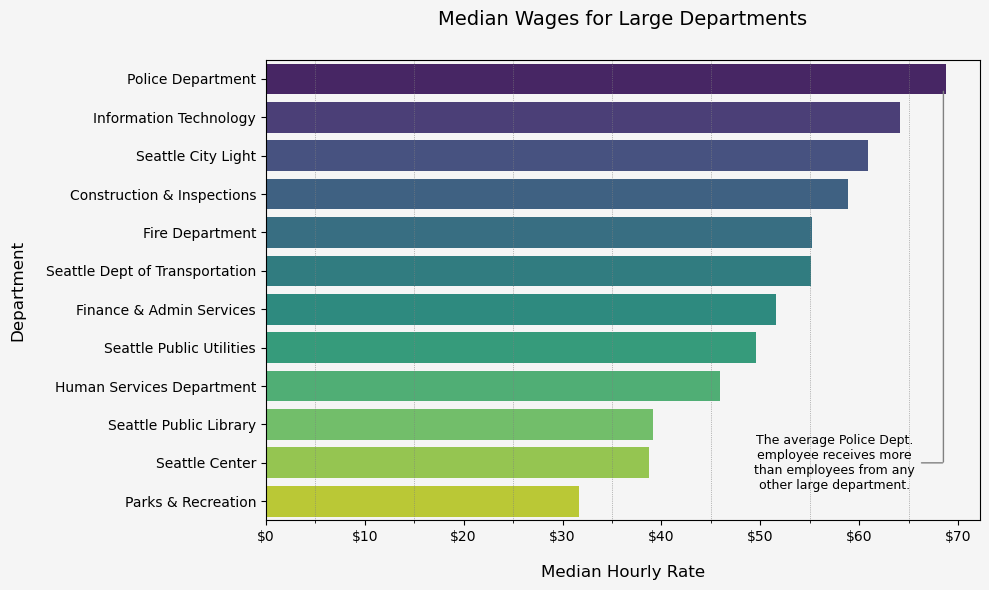

In [6]:
# Sort by median_hourly_rate in descending order
large_departments = large_departments.sort_values('median_hourly_rate', ascending=False)

# Create the horizontal bar plot for 'median_hourly_rate'
plt.figure(figsize=(10, 6))
sns.barplot(
    data=large_departments,
    x='median_hourly_rate',
    y='department',
    hue='department',
    palette='viridis'
)

# Enable minor ticks and add gridlines only on the x-axis
plt.grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='gray')  # Minor gridlines on x-axis only

# Set minor gridlines every 10,000 x units
plt.gca().xaxis.set_minor_locator(MultipleLocator(5))  # Every 10,000 units on x-axis

# Format x-axis tick labels with "$" symbol
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)


# Annotation text
text = "The average Police Dept.\nemployee receives more\nthan employees from any\nother large department."

plt.text(57.5, 10, text,
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=9,
    color='black'
)

# Annotation Line
def draw_line(start, end):
    plt.annotate(
    "",
    start,
    end,
    arrowprops=dict(arrowstyle='-', color='gray')
    )

draw_line((68.5, 0.25), (68.5, 10.05))
draw_line((68.7, 10), (66, 10))



# Add labels and title
plt.xlabel('Median Hourly Rate', fontsize=12, labelpad=15)
plt.ylabel('Department', fontsize=12, labelpad=15)
plt.title('Median Wages for Large Departments', fontsize=14, pad=25)

# Display the plot
plt.tight_layout()
plt.show()


### Hourly Labor Expenditures

"Hourly Labor Expenditure" is the estimated amount of money which a city department spends on wages every hour for all employees. It is represented by the product of the median wage and total number of employees for each department. This assumes all employees are working at the same time, which is, of course, not true given the various employee and department schedules. For example, SPD, SFD, SCL, and SPU employees are more likely to work weekends and odd hours (which in part explains the higher employment rates), while the Finance & Admin office might only work during weekday business hours.

However, this does give us a good way to compare spending footprints between departments, effectively giving us a simplified "hourly budget" across departments.

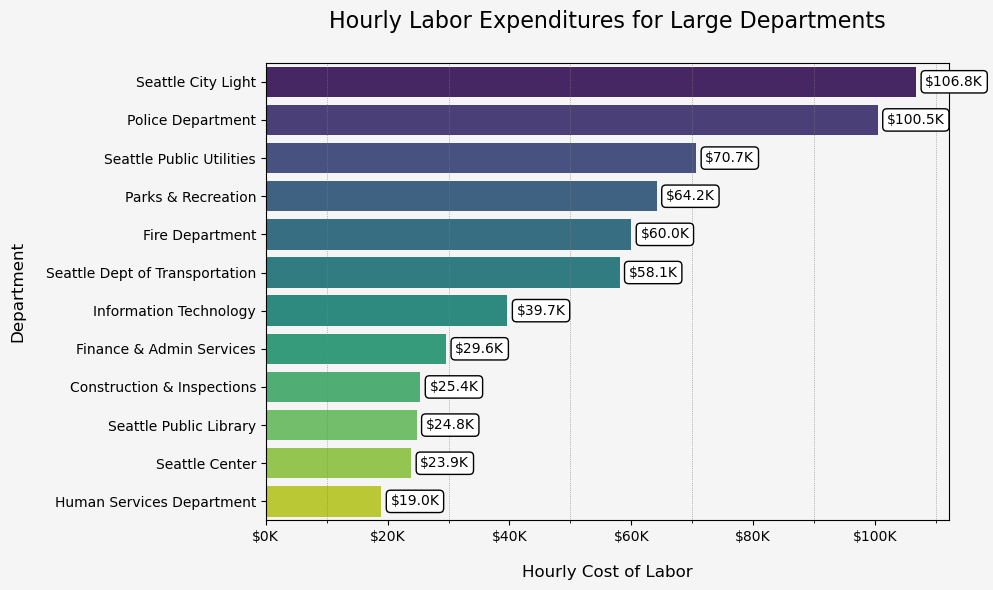

In [7]:
# Sort departments by 'hourly_dept_exp' in descending order
departments_sorted = large_departments.sort_values('hourly_dept_exp', ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=departments_sorted,
    x='hourly_dept_exp',
    y='department',
    hue='department',
    palette='viridis'
)

# Enable minor ticks and add gridlines only on the x-axis
plt.grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='gray')  # Minor gridlines on x-axis only

# Set minor gridlines every 10,000 x units
plt.gca().xaxis.set_minor_locator(MultipleLocator(10000))  # Every 10,000 units on x-axis

# Format x-axis tick labels
formatter = FuncFormatter(lambda x, _: f'${x / 1000:.0f}K')
ax.xaxis.set_major_formatter(formatter)

# Add labels to each bar (formatted with 'K' suffix)
for p in ax.patches:
    value = p.get_width()
    label = f'${value / 1000:.1f}K'  # Format to nearest thousand with "K" suffix 
    ax.text(p.get_width() + 1500, p.get_y() + p.get_height() / 2, 
            label, 
            horizontalalignment='left', verticalalignment='center', fontsize=10, color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))  # Add background and border

# Add labels and title
plt.xlabel('Hourly Cost of Labor', fontsize=12, labelpad=15)
plt.ylabel('Department', fontsize=12, labelpad=15)
plt.title('Hourly Labor Expenditures for Large Departments', fontsize=16, pad=25)

# Display the plot
plt.tight_layout()
plt.show()


Again, the police department sits near the top of this list, outperformed only by SCL (Seattle's municipal power organization). We can also notice that, even though the Parks & Rec department has the lowest median wage of any of the departments, it ranks #4 in terms of overall spending due to the extremely high number of people it employs.

### Comparing the Size and Payscales of the Largest City Departments

We can better visualize the above labor expenditures by directly comparing the sizes of the various departments with the typical wages they offer their employees. A bubble plot is a good visual for this scenario, as we can tie the area of the bubbles to the hourly labor expenditures.

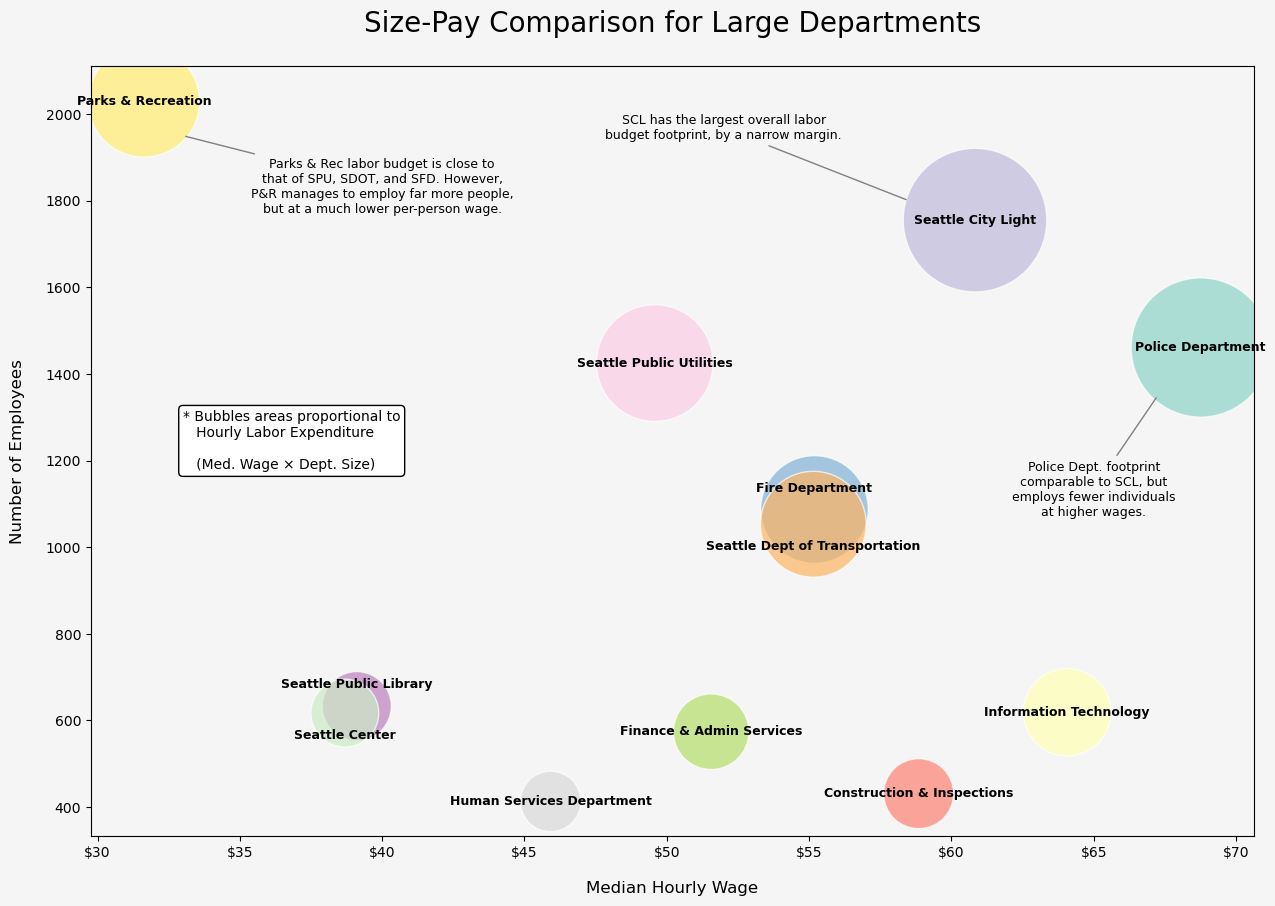

In [8]:
# Figure initiation
plt.figure(figsize=(15, 10))

# Bubble plot creation
plt.scatter(
    x=large_departments['median_hourly_rate'],
    y=large_departments['num_employees'],
    s=(large_departments['hourly_dept_exp']) / 10,
    c=range(len(large_departments)),
    cmap='Set3',
    alpha=0.7,
    edgecolors='w',
)

# Bubble (Department) labels
for i, row in large_departments.iterrows():
    if row['department'] in ["Seattle Public Library", "Fire Department"]:
        y = row['num_employees'] + 50
    elif row['department'] in ["Seattle Center", "Seattle Dept of Transportation"]:
        y = row['num_employees'] - 50
    else:
        y = row['num_employees']

    plt.text(
        row['median_hourly_rate'],  # x-coord
        y,  # y-coord
        row['department'],  # text
        ha='center',
        va='center',
        fontsize=9,
        weight='bold'
    )

# Asterisk note
plt.text(33, 1180,
        "* Bubbles areas proportional to\n   Hourly Labor Expenditure\n\n   (Med. Wage × Dept. Size)",
        fontsize=10,
        bbox=dict(
            facecolor='white',
            boxstyle='round,pad=0.3'
        )
    )

# Formula for quickly-plotted annotations
def annot(text, xy=(0,0), xytext=(0,0)):
    plt.annotate(
        text,
        xy=xy,
        xytext=xytext,
        arrowprops=dict(arrowstyle='-', color='gray'),
        fontsize=9,
        color='black',
        ha='center',
        va='top'
    )


# Police Department annotation
police_text = """Police Dept. footprint
comparable to SCL, but
employs fewer individuals
at higher wages."""

annot(police_text, xy=(67.25, 1350), xytext=(65, 1200))


# Seattle City Light annotation
scl_text = """SCL has the largest overall labor
budget footprint, by a narrow margin."""

annot(scl_text, xy=(58.5, 1800), xytext=(52, 2000))


# Parks & Recreation annotation
pnr_text = """Parks & Rec labor budget is close to
that of SPU, SDOT, and SFD. However,
P&R manages to employ far more people,
but at a much lower per-person wage."""

annot(pnr_text, xy=(33, 1950), xytext=(40, 1900))


# Format x-tick labels
formatter = FuncFormatter(lambda x, _: f'${x:.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Title and axis labels
plt.xlabel('Median Hourly Wage', fontsize=12, labelpad=15)
plt.ylabel('Number of Employees', fontsize=12, labelpad=15)
plt.title('Size-Pay Comparison for Large Departments', fontsize=20, pad=25)

# Show figure
plt.show()


In conclusion, this exploration of Seattle's public sector wage data provides valuable insights into the city's labor distribution and budget allocations across various departments. By examining factors such as median wages, department size, and hourly labor expenditures, we've been able to identify patterns and disparities, particularly within large departments like the Police Department and Parks & Recreation. These insights highlight the complexities of budgeting for public services, especially in departments with high staffing levels or specialized roles. Moving forward, this analysis can serve as a foundation for deeper investigations into the efficiency and effectiveness of city spending, providing opportunities for informed decision-making in future budget planning and policy discussions.